In [1]:
from hpsklearn import estimator, components
import numpy as np
from sklearn.datasets import fetch_mldata
from hyperopt import tpe
import sklearn.metrics
import sklearn.cross_validation
import pandas as pd
import fonctions_auxiliaires as aux
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
warnings.filterwarnings('ignore')

In [3]:
data =pd.read_csv('Datasets/winequality-white.csv', delimiter =';')

y = data['quality']
X = data
del X['quality']

In [4]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, random_state=1)

### General results

In [7]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=1800)

In [8]:
estim.fit(np.ascontiguousarray(X_train), np.ascontiguousarray(y_train))

In [9]:
print(estim.score(X_train, y_train))

1.0


In [10]:
print(estim.score(X_test, y_test))

0.661224489796


In [11]:
print(estim.best_model())

{'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': (), 'learner': GradientBoostingClassifier(init=None, learning_rate=0.003197833294479753,
              loss='deviance', max_depth=None,
              max_features=0.5014479126685896, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=95,
              presort='auto', random_state=1, subsample=0.5907649799677235,
              verbose=0, warm_start=False)}


In [12]:
y = estim.predict(X_test)
metrics_wine = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [13]:
metrics_wine

(1.0, 0.66122448979591841, nan, nan, nan)

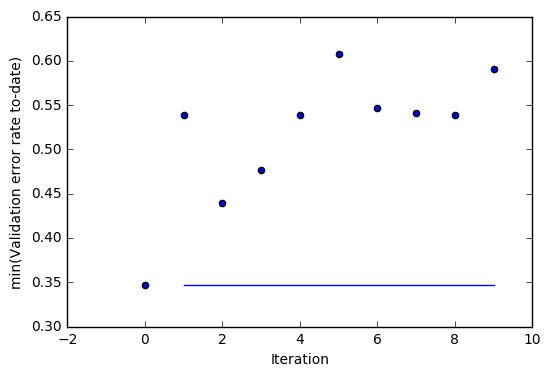

In [14]:
aux.plot_perf(estim)

In [16]:
aux.time_retriever(estim)

{0: 1482227058.0,
 1: 1482227265.0,
 2: 1482227266.0,
 3: 1482227298.0,
 4: 1482227298.0,
 5: 1482227301.0,
 6: 1482227302.0,
 7: 1482227310.0,
 8: 1482227320.0,
 9: 1482227322.0}

### Intermediate results

In [17]:
estim_iter = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=300)

In [18]:
predictions, accuracies = aux.fit_intermediate(estim_iter, np.ascontiguousarray(X_train), np.ascontiguousarray(y_train),\
                                              X_test, y_test)

Trial 1 loss: 0.5401360544217687
Trial 2 loss: 0.48027210884353744
Trial 3 loss: 0.41088435374149657
Trial 4 loss: 0.5387755102040817
Trial 5 loss: 0.6489795918367347
Trial 6 loss: 0.3564625850340136
Trial 7 loss: 0.4693877551020408
Trial 8 loss: 0.40816326530612246
Trial 9 loss: 0.5428571428571429
Trial 10 loss: 0.5115646258503401
Test accuracy: 0.66612244898
Predict: [5 5 7 ..., 5 6 6]
Best Model: {'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': (), 'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=0.2587549039324526,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=False, random_state=2, verbose=False,
            warm_start=False)}
====End of demo====


In [19]:
metrics_iter = []
for i in range(0, len(predictions)-1):
    y = predictions[i]
    metrics_iter.append(aux.metrics(estim_iter, X_train, y_train, X_test, y_test, y))


In [20]:
metrics_iter

[(0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan),
 (0.99918322896814593, 0.66612244897959183, nan, nan, nan)]

In [21]:
predictions

[array([5, 6, 6, ..., 6, 6, 6]),
 array([5, 5, 6, ..., 6, 6, 6]),
 array([5, 5, 6, ..., 6, 6, 6]),
 array([5, 5, 6, ..., 6, 6, 6]),
 array([5, 5, 6, ..., 6, 6, 6]),
 array([5, 5, 7, ..., 5, 6, 6]),
 array([5, 5, 7, ..., 5, 6, 6]),
 array([5, 5, 7, ..., 5, 6, 6]),
 array([5, 5, 7, ..., 5, 6, 6]),
 array([5, 5, 7, ..., 5, 6, 6])]

In [22]:
accuracies

[0.45877551020408164,
 0.48571428571428571,
 0.52816326530612245,
 0.52816326530612245,
 0.52816326530612245,
 0.66612244897959183,
 0.66612244897959183,
 0.66612244897959183,
 0.66612244897959183,
 0.66612244897959183]

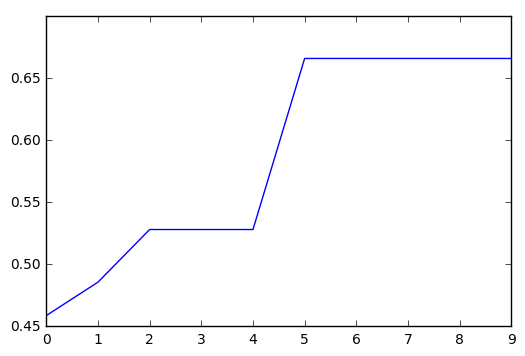

In [23]:
plt.plot(accuracies)
plt.show()

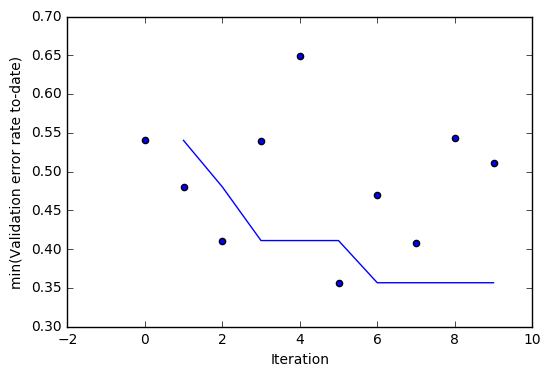

In [24]:
aux.plot_perf(estim_iter)